### Imports 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.ticker as mticker

### Datasources

In [2]:
df_train_opacus = pd.read_csv("data/train_results.csv")
df_validation_opacus = pd.read_csv("data/validation_results.csv")

df_train_base = pd.read_csv("data/train_results_base.csv")
df_validation_base = pd.read_csv("data/validation_results_base.csv")

### Data transformation

In [3]:
df_validation_opacus["model"] = "w/ opacus"
df_validation_base["model"] = "pure pytorch"

# Concatenate them into one long-form dataframe
df_combined = pd.concat([df_validation_opacus, df_validation_base], ignore_index=True)

In [4]:
df_val_opacus_clip05 = df_validation_opacus[df_validation_opacus["clip"] == 0.5]
df_val_opacus_clip1 = df_validation_opacus[df_validation_opacus["clip"] == 1]
df_val_opacus_clip2 = df_validation_opacus[df_validation_opacus["clip"] == 2]

In [5]:
df_val_opacus_noise05 = df_validation_opacus[df_validation_opacus["noise"] == 0.5]
df_val_opacus_noise1 = df_validation_opacus[df_validation_opacus["noise"] == 1]
df_val_opacus_noise2 = df_validation_opacus[df_validation_opacus["noise"] == 2]

In [6]:
df_train_opacus_clip05 = df_train_opacus[df_train_opacus["clip"] == 0.5]
df_train_opacus_clip1 = df_train_opacus[df_train_opacus["clip"] == 1]

In [7]:
df_combined_opacus = pd.merge(
    df_train_opacus,
    df_validation_opacus,
    on=["noise", "clip", "epoch"],
    suffixes=("_train", "_validation")
)
df_combined_opacus_noise_not05 = df_combined_opacus[df_combined_opacus["noise"] != 0.5]
df_combined_opacus_noise_05 = df_combined_opacus[df_combined_opacus["noise"] == 0.5]

### Plotting functions

In [ ]:
def plot_f1_score_noise(df, clip_value, noise_in_focus = 1):
    plt.figure(figsize=(6,6))
    ax = sns.lineplot(data=df, x="epoch", y="f1", hue="noise")

    # Force the x-axis to use integer steps for epochs
    ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

    # Remove borders
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Remove the legend
    if ax.get_legend() is not None:
        ax.get_legend().remove()


    noise_levels = [0.5,1,1.5,2]
    # Add text labels at the end of each line matching the line color
    for i, line in enumerate(ax.get_lines()):
        x_data = line.get_xdata()
        y_data = line.get_ydata()
        if len(x_data) == 0 or len(y_data) == 0:
            continue
        label = "noise = " + str(noise_levels[i])
        color = line.get_color()

        # Place the text just to the right of the last data point
        text_alpha = 1
        if noise_levels[i] != noise_in_focus:
            line.set_alpha(0.3)
            text_alpha = 0.3
        ax.text(x_data[-1] + 0.1, y_data[-1], label, color=color, fontsize=16, verticalalignment="center", alpha = text_alpha)

    ax.set_ylim(0.60, 0.95)

    # Increase font size for x and y tick labels and remove tick-lines
    ax.tick_params(axis='both', labelsize=20)
    ax.tick_params(axis='x', which='both', length=0)

    # Add titles and set fontsize
    plt.title(f"clip value = {clip_value}", fontsize=16, pad=20)
    plt.xlabel("Epoch", size=14)
    plt.ylabel("F1-Score", size=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.tight_layout()
    plt.show()


In [ ]:
def plot_f1_score_clip(df, noise_value, clip_in_focus = 1):
    plt.figure(figsize=(6,6))
    ax = sns.lineplot(data=df, x="epoch", y="f1", hue="clip")

    # Force the x-axis to use integer steps for epochs
    ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

    # Remove borders
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Remove the legend 
    if ax.get_legend() is not None:
        ax.get_legend().remove()

    clip_levels = [0.5,1,2]
    # Add text labels at the end of each line matching the line color
    for i, line in enumerate(ax.get_lines()):
        x_data = line.get_xdata()
        y_data = line.get_ydata()
        if len(x_data) == 0 or len(y_data) == 0:
            continue
        label = "clip = " + str(clip_levels[i])
        color = line.get_color()

        # Place the text just to the right of the last data point
        text_alpha = 1
        if clip_levels[i] != clip_in_focus:
            line.set_alpha(0.3)
            text_alpha = 0.3
        ax.text(x_data[-1] + 0.1, y_data[-1], label, color=color, fontsize=16, verticalalignment="center", alpha = text_alpha)

    
    ax.set_ylim(0.60, 0.95)
    # Increase font size for x and y tick labels and remove x-ticks
    ax.tick_params(axis='both', labelsize=20)
    ax.tick_params(axis='x', which='both', length=0)

    # Set titles and fontsize
    plt.title(f"Noise value = {noise_value}", fontsize=16, pad=20)
    plt.xlabel("Epoch", size=14)
    plt.ylabel("F1-Score", size=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_epsilon_score(df, noise_value, clip_in_focus = 1):
    plt.figure(figsize=(6,6))
    ax = sns.lineplot(data=df, x="epoch", y="epsilon", hue="clip")

    # Force the x-axis to use integer steps for epochs
    ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

    # Remove borders
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Remove the legend 
    if ax.get_legend() is not None:
        ax.get_legend().remove()


    noise_levels = [0.5,1,1.5,2]
    # Add text labels at the end of each line
    for i, line in enumerate(ax.get_lines()):
        x_data = line.get_xdata()
        y_data = line.get_ydata()
        if len(x_data) == 0 or len(y_data) == 0:
            continue
        label = "clip = " + str(noise_levels[i])
        color = line.get_color()

        # Place the text just to the right of the last data point
        text_alpha = 1
        if noise_levels[i] != clip_in_focus:
            line.set_alpha(0.3)
            text_alpha = 0.3
        ax.text(x_data[-1] + 0.1, y_data[-1], label, color=color, fontsize=16, verticalalignment="center", alpha = text_alpha)

    # Increase font size for x and y tick labels and remove x-tick stem
    ax.tick_params(axis='both', labelsize=20)
    ax.tick_params(axis='x', which='both', length=0)

    # Set title and fontsize
    plt.title(f"Noise value = {noise_value}", fontsize=16, pad=20)
    plt.xlabel("Epoch", size=14)
    plt.ylabel("Epsilon (lower is better privacy)", size=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.tight_layout()
    plt.show()

In [ ]:
def compare_f1_epsilon():
    models = df_combined_opacus_noise_not05['model'].unique()
    f1_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    epsilon_colors = ['tab:cyan', 'tab:olive', 'tab:pink', 'tab:gray']

    # Create two subplots that share the same x-axis
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8,8))

    # Plot F1-scores for each model on the top subplot 
    for i, model in enumerate(models):
        sub_df = df_combined_opacus_noise_not05[df_combined_opacus_noise_not05['model'] == model]
        sns.lineplot(data=sub_df, x='epoch', y='f1', marker='o',
                    color=f1_colors[i % len(f1_colors)], ax=ax1
                    )
        
    ax1.set_ylabel("F1-Score", size=16, c = f1_colors[0])
    ax1.tick_params(axis='y', labelsize=20, colors = f1_colors[0])
    
    # Set y-axis tick format to 2 decimal points and remove borders
    ax1.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
    ax1.spines[["left", "right", "bottom", "top"]].set_visible(False)

    # Remove x-tick lines and keep the tick values
    ax1.tick_params(axis='x', which='both', length=0)
    ax1.tick_params(axis='y', which='both', length=0)

    ax1.set_ylim(0.7, 0.9)

    # Plot epsilon for each model on the bottom subplot 
    for i, model in enumerate(models):
        sub_df = df_combined_opacus_noise_not05[df_combined_opacus_noise_not05['model'] == model]
        sns.lineplot(data=sub_df, x='epoch', y='epsilon', marker='o',
                    color=f1_colors[i % len(epsilon_colors) + 1], ax=ax2
                    )
        
    ax2.set_xlabel("Epoch", size=16)
    ax2.set_ylabel("Epsilon", size=16, c = f1_colors[1])

    # Set y-axis tick format to 2 decimal points and remove borders
    ax2.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
    ax2.spines[["left", "right", "bottom", "top"]].set_visible(False)

    # Force the x-axis to use integer ticks on the bottom subplot
    ax2.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

    # Increase font size for x and y tick labels
    ax2.tick_params(axis='both', labelsize=20)
    
    # Remove x-tick lines and keep the tick values
    ax2.tick_params(axis='x', which='both', length=0)
    ax2.tick_params(axis='y', which='both', length=0, colors = f1_colors[1])
    ax2.set_ylim(0,0.3)

    fig.suptitle("Epsilon and F1-score are correlated", fontsize=16, y=0.96)
    plt.tight_layout(rect=[0,0,1,0.93])

    plt.show()

In [ ]:
def compare_base_opacus():
    plt.figure(figsize=(6,6))
    ax = sns.lineplot(data=df_combined, x="epoch", y="f1", hue="model")

    # Force the x-axis to use integer steps for epochs
    ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

    # Remove borders
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Remove legend
    if ax.get_legend() is not None:
        ax.get_legend().remove()

    ax.tick_params(axis='x', labelsize=16, length=0)
    ax.tick_params(axis='y', labelsize=14, length=0)

    # Add a title
    plt.title("Opacus yields consistently lower F1-scores", fontsize=16, pad=20)

    # Add text to the lines
    plt.text(x = 4.1, y = 0.975, s = "pure pytorch", c = "tab:orange", size = 16)
    plt.text(x = 4.19, y = 0.842, s = "w/ opacus", c = "tab:blue", size = 16, rotation  = 4)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.xlabel("Epoch", size = 14)
    plt.ylabel("F1-Score", size = 14)

    plt.tight_layout()
    plt.show()

In [ ]:
def show_aggregated():
    df_long = pd.melt(
        df_combined,
        id_vars=[col for col in df_combined.columns if col not in ["precision", "recall", "accuracy", "f1"]],
        value_vars=["precision", "recall", "accuracy", "f1"],
        var_name="measure",
        value_name="score"
    )
    order = list(df_long["measure"].unique())[::-1]
    hue_order = sorted(df_long["model"].unique())

    plt.figure(figsize=(6,6))
    ax = sns.barplot(
        data=df_long, 
        x="measure", 
        y="score", 
        hue="model", 
        order=order, 
        hue_order=hue_order
    )

    # Remove the left and bottom spines and stems
    sns.despine(left=True, bottom=False)
    ax.tick_params(axis='x', labelsize=16, length=0)
    ax.tick_params(axis='y', labelsize=14, length=0)

    ax.legend(
        loc="upper center", 
        bbox_to_anchor=(0.5, -0.05), 
        ncol=len(df_long["model"].unique()), 
        fontsize=10, 
        title_fontsize=12, 
        frameon=False
    )

    # Iterate over all bars and adjust their alpha
    for i, patch in enumerate(ax.patches):
        # Highlight the first two bars
        if i == 0 or i == 4:
            patch.set_alpha(1) 
        else:
            patch.set_alpha(0.3)  

    plt.tight_layout()
    plt.xlabel("")
    plt.ylabel("")
    plt.show()

## Plot figures

### Comparing F1-scores between values for noise and clipping in Opacus

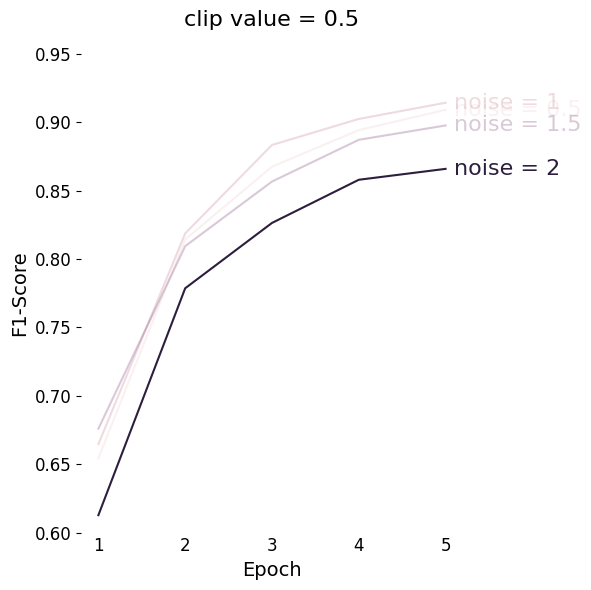

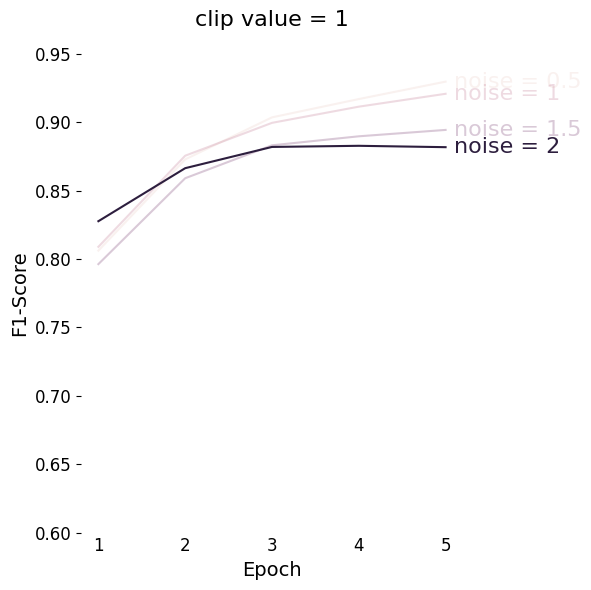

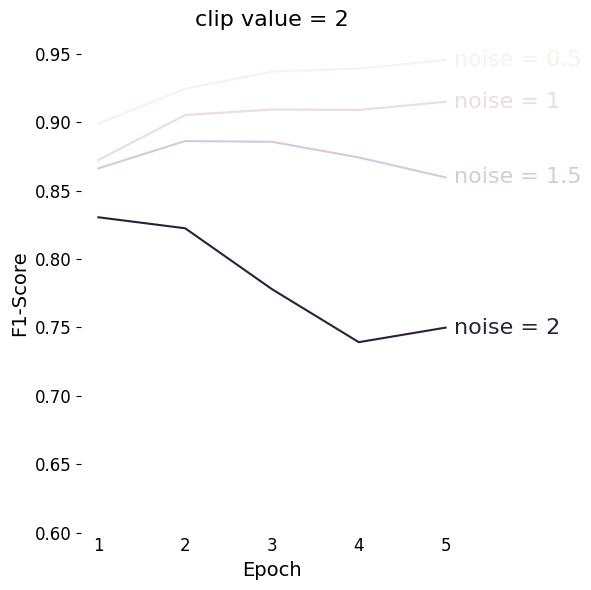

In [15]:
noise_in_focus = 2
plot_f1_score_noise(df_val_opacus_clip05, 0.5, noise_in_focus)
plot_f1_score_noise(df_val_opacus_clip1, 1, noise_in_focus)
plot_f1_score_noise(df_val_opacus_clip2, 2, noise_in_focus) 

### Comparing F1-scores between values for clipping at constant noise levels

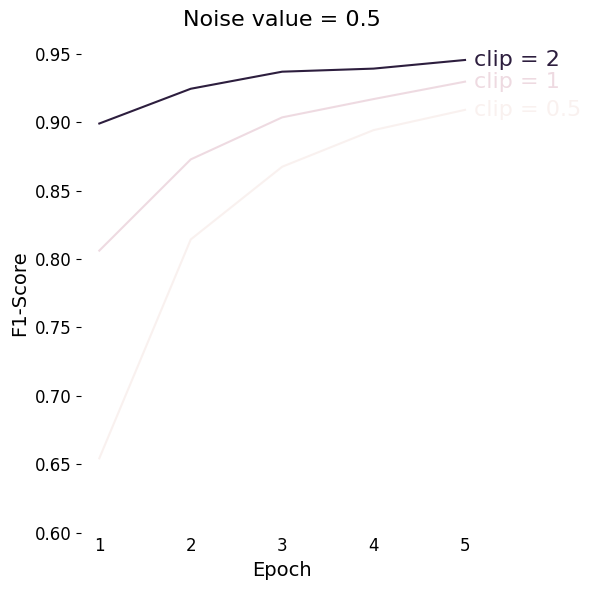

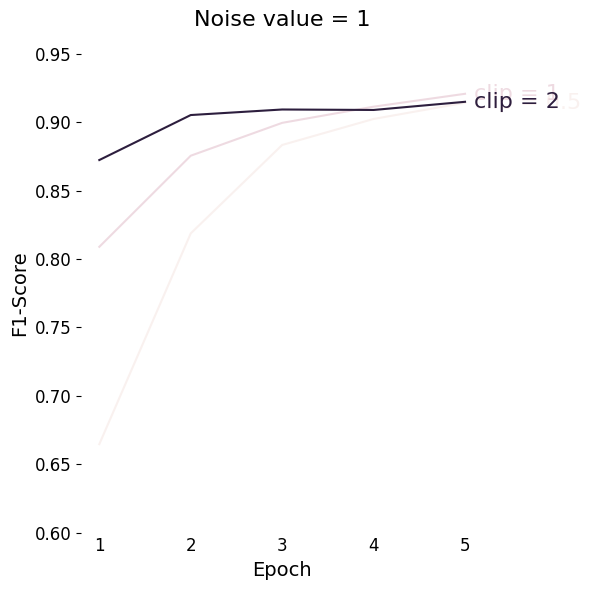

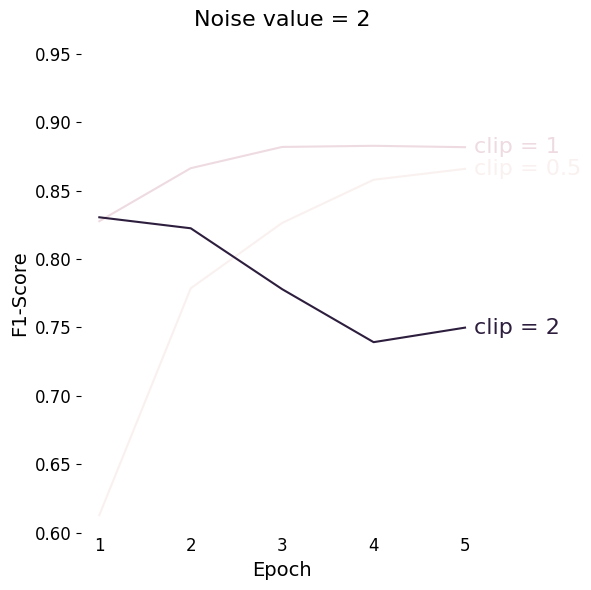

In [16]:
clip_in_focus = 2
plot_f1_score_clip(df_val_opacus_noise05, 0.5, clip_in_focus)
plot_f1_score_clip(df_val_opacus_noise1, 1, clip_in_focus)
plot_f1_score_clip(df_val_opacus_noise2, 2, clip_in_focus) 

### Showing the relationship between F1-score and epsilon 

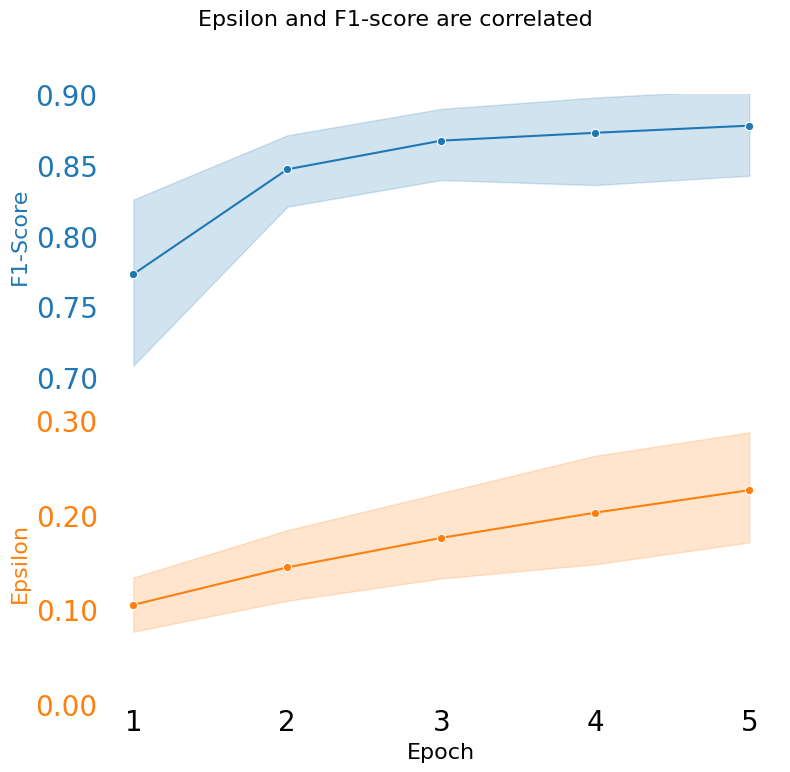

In [17]:
compare_f1_epsilon()

### Comparing F1-score between Opacus and pure Pytorch

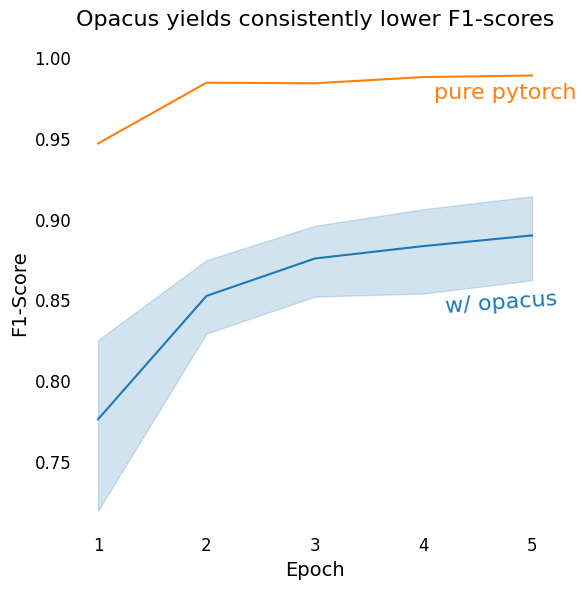

In [18]:
compare_base_opacus()

### Showing aggregated accuracy, precision, recall and f1 score with confidence intervall

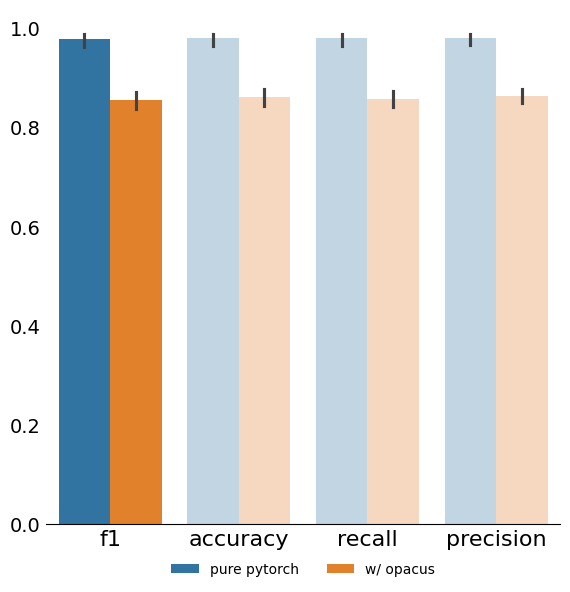

In [19]:
show_aggregated()